# Covid 19 Impact analysis Masai Python Project   Mohit Patle

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing data

In [2]:
data = pd.read_csv("transformed_data.csv")
data_1 = pd.read_csv("raw_data.csv")

In [3]:
data.head(10)

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754
5,AFG,Afghanistan,2020-01-05,0.498,0.0,0.0,0.0,17.477233,7.497754
6,AFG,Afghanistan,2020-01-06,0.498,0.0,0.0,0.0,17.477233,7.497754
7,AFG,Afghanistan,2020-01-07,0.498,0.0,0.0,0.0,17.477233,7.497754
8,AFG,Afghanistan,2020-01-08,0.498,0.0,0.0,0.0,17.477233,7.497754
9,AFG,Afghanistan,2020-01-09,0.498,0.0,0.0,0.0,17.477233,7.497754


In [4]:
data_1.head(10)

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
5,AFG,Afghanistan,2020-01-05,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
6,AFG,Afghanistan,2020-01-06,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
7,AFG,Afghanistan,2020-01-07,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
8,AFG,Afghanistan,2020-01-08,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
9,AFG,Afghanistan,2020-01-09,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494


### Data preparation

In [5]:
data.shape

(50418, 9)

In [6]:
data_1.shape

(50418, 14)

In [7]:
data.isnull().sum()

CODE          0
COUNTRY       0
DATE          0
HDI        6202
TC            0
TD            0
STI           0
POP           0
GDPCAP        0
dtype: int64

In [8]:
data_1.isnull().sum()

iso_code                       0
location                       0
date                           0
total_cases                 3094
total_deaths               11190
stringency_index            7126
population                     0
gdp_per_capita              5712
human_development_index     6202
Unnamed: 9                     0
Unnamed: 10                    0
Unnamed: 11                    0
Unnamed: 12                    0
Unnamed: 13                    0
dtype: int64

In [9]:
country_count = (pd.DataFrame(data["COUNTRY"].value_counts())).reset_index()
country_count.columns = ['Country','Count']
country_count

,Country,Count
0,Japan,294
1,Mexico,294
2,Austria,294
3,Israel,294
4,United Kingdom,294
...,...,...
205,Tajikistan,172
206,Comoros,171
207,Lesotho,158
208,Hong Kong,51


### 1. Aggregating the data

In [10]:
code = data['CODE'].unique().tolist()
country = data['COUNTRY'].unique().tolist()
hdi = []
tc = []
td = []
sti = []
population = data['POP'].unique().tolist()

In [11]:
data

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
...,...,...,...,...,...,...,...,...,...
50413,ZWE,Zimbabwe,2020-10-15,0.535,8.994048,5.442418,4.341855,16.514381,7.549491
50414,ZWE,Zimbabwe,2020-10-16,0.535,8.996528,5.442418,4.341855,16.514381,7.549491
50415,ZWE,Zimbabwe,2020-10-17,0.535,8.999496,5.442418,4.341855,16.514381,7.549491
50416,ZWE,Zimbabwe,2020-10-18,0.535,9.000853,5.442418,4.341855,16.514381,7.549491


In [12]:
for i in country:
    hdi.append((data.loc[data['COUNTRY'] == i,'HDI']).sum()/country_count.loc[country_count['Country']==i,'Count'])
    tc.append((data_1.loc[data_1["location"] == i, "total_cases"]).sum())
    td.append((data_1.loc[data_1["location"] == i, "total_deaths"]).sum())
    sti.append((data.loc[data["COUNTRY"] == i, "STI"]).sum()/country_count.loc[country_count['Country']==i,'Count'])
    population.append((data_1.loc[data_1["location"] == i, "population"]).sum()/country_count.loc[country_count['Country']==i,'Count'])

aggregated_data = pd.DataFrame(list(zip(code, country, hdi, tc, td, sti, population)), 
                               columns = ["Country Code", "Country", "HDI", "Total Cases", 
                                          "Total Deaths", "Stringency Index", "Population"])
aggregated_data

,Country Code,Country,HDI,Total Cases,Total Deaths,Stringency Index,Population
0,AFG,Afghanistan,"5 0.498 Name: Count, dtype: float64",5126433.0,165875.0,"5 3.049673 Name: Count, dtype: float64",17.477233
1,ALB,Albania,"96 0.785 Name: Count, dtype: float64",1071951.0,31056.0,"96 3.927348 Name: Count, dtype: float64",14.872537
2,DZA,Algeria,"61 0.754 Name: Count, dtype: float64",4893999.0,206429.0,"61 3.195168 Name: Count, dtype: float64",17.596309
3,AND,Andorra,"93 0.858 Name: Count, dtype: float64",223576.0,9850.0,"93 3.48332 Name: Count, dtype: float64",11.254996
4,AGO,Angola,"178 0.581 Name: Count, dtype: float64",304005.0,11820.0,"178 4.112616 Name: Count, dtype: float64",17.307957
...,...,...,...,...,...,...,...
205,VEN,Venezuela,"125 0.761 Name: Count, dtype: float64",4839834.0,40840.0,"125 4.343886 Name: Count, dtype: float64",17.163165
206,VNM,Vietnam,"29 0.694 Name: Count, dtype: float64",122618.0,2318.0,"29 3.710868 Name: Count, dtype: float64",18.393706
207,YEM,Yemen,"204 0.452 Name: Count, dtype: float64",228925.0,64304.0,"204 3.609601 Name: Count, dtype: float64",17.210890
208,ZMB,Zambia,"151 0.588 Name: Count, dtype: float64",1129913.0,26475.0,"151 3.617026 Name: Count, dtype: float64",16.726989


In [13]:
aggregated_data.columns.values

array(['Country Code', 'Country', 'HDI', 'Total Cases', 'Total Deaths',
       'Stringency Index', 'Population'], dtype=object)

### 2. Sorting Data According to Total Cases

In [14]:
data_2 = aggregated_data.sort_values(by=["Total Cases"], ascending=False)
data_2 = data_2.head(10)
print(data_2)

    Country Code         Country                                      HDI  \
200          USA   United States  49    0.924
Name: Count, dtype: float64   
27           BRA          Brazil  14    0.759
Name: Count, dtype: float64   
90           IND           India   25    0.64
Name: Count, dtype: float64   
157          RUS          Russia  28    0.816
Name: Count, dtype: float64   
150          PER            Peru   74    0.75
Name: Count, dtype: float64   
125          MEX          Mexico   1    0.774
Name: Count, dtype: float64   
178          ESP           Spain  63    0.891
Name: Count, dtype: float64   
175          ZAF    South Africa  69    0.699
Name: Count, dtype: float64   
42           COL        Colombia  83    0.747
Name: Count, dtype: float64   
199          GBR  United Kingdom   4    0.922
Name: Count, dtype: float64   

     Total Cases  Total Deaths                            Stringency Index  \
200  746014098.0    26477574.0  49    3.350949
Name: Count, dtype: float64

###### Top 10 Countries with Highest Covid Cases

In [15]:
data_2 = data_2.head(10)
print(data_2)

    Country Code         Country                                      HDI  \
200          USA   United States  49    0.924
Name: Count, dtype: float64   
27           BRA          Brazil  14    0.759
Name: Count, dtype: float64   
90           IND           India   25    0.64
Name: Count, dtype: float64   
157          RUS          Russia  28    0.816
Name: Count, dtype: float64   
150          PER            Peru   74    0.75
Name: Count, dtype: float64   
125          MEX          Mexico   1    0.774
Name: Count, dtype: float64   
178          ESP           Spain  63    0.891
Name: Count, dtype: float64   
175          ZAF    South Africa  69    0.699
Name: Count, dtype: float64   
42           COL        Colombia  83    0.747
Name: Count, dtype: float64   
199          GBR  United Kingdom   4    0.922
Name: Count, dtype: float64   

     Total Cases  Total Deaths                            Stringency Index  \
200  746014098.0    26477574.0  49    3.350949
Name: Count, dtype: float64

In [16]:
data_2['Country']

200     United States
27             Brazil
90              India
157            Russia
150              Peru
125            Mexico
178             Spain
175      South Africa
42           Colombia
199    United Kingdom
Name: Country, dtype: object

### 3. Add two more columns (GDP per capita before Covid-19 & GDP per capita during Covid-19) to this dataset

In [17]:
data_2["GDP Before Covid"] = [65279.53, 8897.49, 2100.75, 
                            11497.65, 7027.61, 9946.03, 
                            29564.74, 6001.40, 6424.98, 42354.41]
data_2["GDP During Covid"] = [63543.58, 6796.84, 1900.71, 
                            10126.72, 6126.87, 8346.70, 
                            27057.16, 5090.72, 5332.77, 40284.64]
print(data_2)

    Country Code         Country                                      HDI  \
200          USA   United States  49    0.924
Name: Count, dtype: float64   
27           BRA          Brazil  14    0.759
Name: Count, dtype: float64   
90           IND           India   25    0.64
Name: Count, dtype: float64   
157          RUS          Russia  28    0.816
Name: Count, dtype: float64   
150          PER            Peru   74    0.75
Name: Count, dtype: float64   
125          MEX          Mexico   1    0.774
Name: Count, dtype: float64   
178          ESP           Spain  63    0.891
Name: Count, dtype: float64   
175          ZAF    South Africa  69    0.699
Name: Count, dtype: float64   
42           COL        Colombia  83    0.747
Name: Count, dtype: float64   
199          GBR  United Kingdom   4    0.922
Name: Count, dtype: float64   

     Total Cases  Total Deaths                            Stringency Index  \
200  746014098.0    26477574.0  49    3.350949
Name: Count, dtype: float64

###### Note: The data about the GDP per capita is collected manually.

# Analyzing the Spread of Covid-19

###### 1. Highest no. of total cases

[Text(0.5, 1.0, 'Total no of covid cases')]

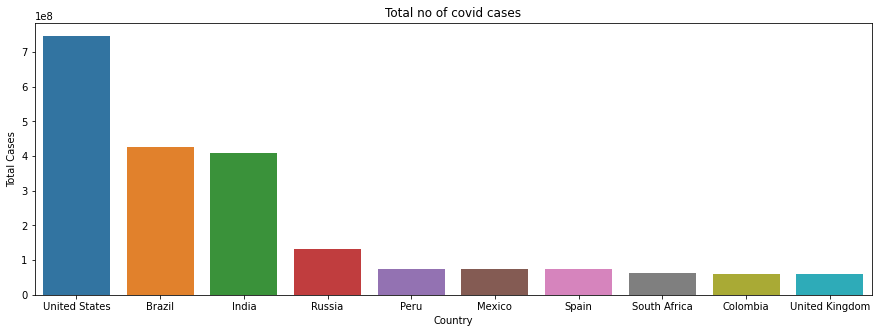

In [18]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x=data_2['Country'], y=data_2['Total Cases'], ax=ax).set(title='Total no of covid cases')

###### 2.Highest no. of death cases

[Text(0.5, 1.0, 'Total no of deaths')]

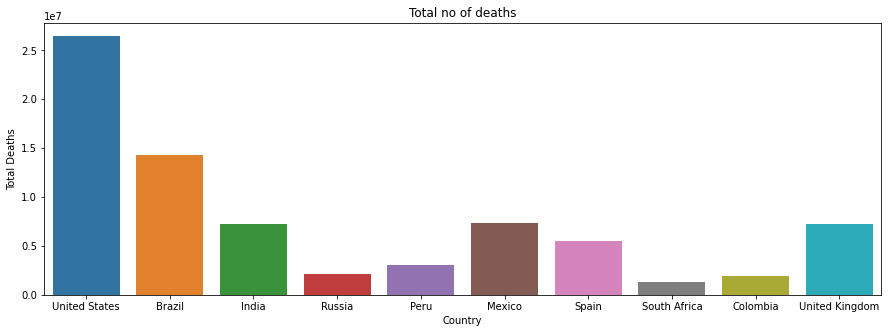

In [19]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x=data_2['Country'], y=data_2['Total Deaths'], ax=ax).set(title='Total no of deaths')

###### 3. Percentage of deaths

In [20]:
data_2['Percentage of deaths'] = (data_2['Total Deaths']/data_2['Total Cases'])*100
data_2

,Country Code,Country,HDI,Total Cases,Total Deaths,Stringency Index,Population,GDP Before Covid,GDP During Covid,Percentage of deaths
200,USA,United States,"49 0.924 Name: Count, dtype: float64",746014098.0,26477574.0,"49 3.350949 Name: Count, dtype: float64",19.617637,65279.53,63543.58,3.549206
27,BRA,Brazil,"14 0.759 Name: Count, dtype: float64",425704517.0,14340567.0,"14 3.136028 Name: Count, dtype: float64",19.174732,8897.49,6796.84,3.368667
90,IND,India,"25 0.64 Name: Count, dtype: float64",407771615.0,7247327.0,"25 3.610552 Name: Count, dtype: float64",21.045353,2100.75,1900.71,1.777301
157,RUS,Russia,"28 0.816 Name: Count, dtype: float64",132888951.0,2131571.0,"28 3.380088 Name: Count, dtype: float64",18.798668,11497.65,10126.72,1.604024
150,PER,Peru,"74 0.75 Name: Count, dtype: float64",74882695.0,3020038.0,"74 4.291307 Name: Count, dtype: float64",17.311165,7027.61,6126.87,4.033025
125,MEX,Mexico,"1 0.774 Name: Count, dtype: float64",74347548.0,7295850.0,"1 3.019289 Name: Count, dtype: float64",18.674802,9946.03,8346.70,9.813168
178,ESP,Spain,"63 0.891 Name: Count, dtype: float64",73717676.0,5510624.0,"63 3.405506 Name: Count, dtype: float64",17.660427,29564.74,27057.16,7.475309
175,ZAF,South Africa,"69 0.699 Name: Count, dtype: float64",63027659.0,1357682.0,"69 3.863726 Name: Count, dtype: float64",17.898266,6001.40,5090.72,2.154105
42,COL,Colombia,"83 0.747 Name: Count, dtype: float64",60543682.0,1936134.0,"83 4.311045 Name: Count, dtype: float64",17.745037,6424.98,5332.77,3.197913
199,GBR,United Kingdom,"4 0.922 Name: Count, dtype: float64",59475032.0,7249573.0,"4 3.353883 Name: Count, dtype: float64",18.033340,42354.41,40284.64,12.189271


[Text(0.5, 1.0, 'Percentage of Deaths')]

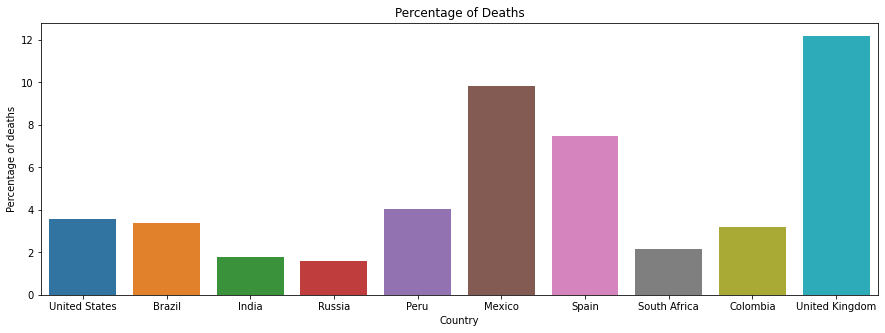

In [21]:
fig, ax = plt.subplots(figsize=(15, 5))   
sns.barplot(x=data_2['Country'], y=data_2['Percentage of deaths'], ax=ax).set(title='Percentage of Deaths')

###### 4. Percentage of total cases and death

In [22]:
Total_Cases_all_country = data_2['Total Cases'].sum()
Total_Deaths_all_country = data_2['Total Deaths'].sum()
print(Total_Cases_all_country,Total_Deaths_all_country)

2118373473.0 76566940.0


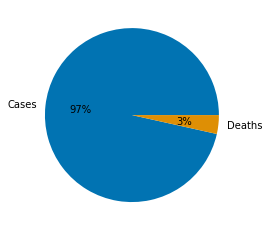

In [23]:
values = [Total_Cases_all_country, Total_Deaths_all_country]
labels = ['Cases', 'Deaths']
palette_color = sns.color_palette('colorblind')
plt.pie(values, labels=labels, colors = palette_color, autopct='%.0f%%')
plt.show()

###### 5. Impact on Economy (Drop in GDP)

In [24]:
data_2['Percentage_change_in_GDP'] = abs((data_2['GDP Before Covid']-data_2['GDP During Covid'])/data_2['GDP Before Covid'])*100 
data_2['Percentage_change_in_GDP']

200     2.659256
27     23.609467
90      9.522313
157    11.923567
150    12.817160
125    16.080084
178     8.481658
175    15.174459
42     16.999430
199     4.886787
Name: Percentage_change_in_GDP, dtype: float64

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

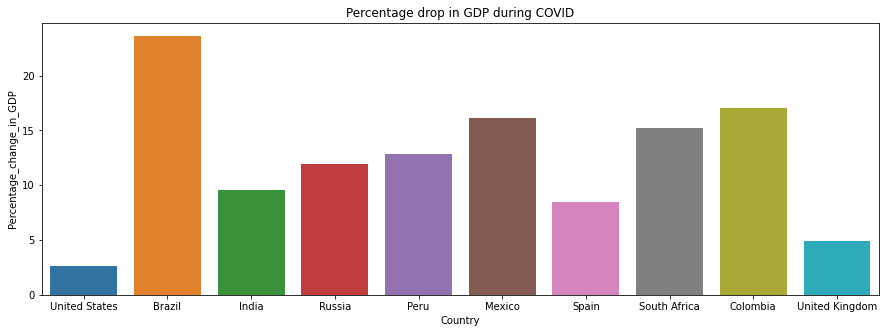

In [25]:
fig, ax = plt.subplots(figsize=(15, 5)) 
sns.barplot(x=data_2['Country'], y=data_2['Percentage_change_in_GDP']).set(title='Percentage drop in GDP during COVID')
for i in ax.containers:
    ax.bar_label(i,)